In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE
from csv_dtypes import column_dtypes

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

In [2]:
all_files = glob.glob("../roll_data/*-modproc.csv")

df = pd.concat((pd.read_csv(f, dtype=column_dtypes) for f in all_files), ignore_index=True)

seasons = [15]
df = df[df['season'].isin(seasons)]
len(df)

70505

In [16]:
dfc = df.copy()
for exclude_mod in []:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]


#Shows Haunted Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Electric Proc
#for exclude_event in ["Bonk", "No Bonk", " Ambushed", "NoBush", "Charmed", "NoCharm", "NoHaunt", "YesHaunt", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Peanut Mister Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "NoHaunt", "YesHaunt", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Grind Rail Proc
for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "NoHaunt", "YesHaunt"]:
    dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Mild Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "NoHaunt", "YesHaunt", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Taste the Infinite (Batter) Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "NoHaunt", "YesHaunt", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Taste the Infinite (Pitcher) Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "NoHaunt", "YesHaunt", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Debt Proc
#for exclude_event in ["NoHaunt", "YesHaunt", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Birds Ambush Proc
#for exclude_event in ["Bonk", "No Bonk", "NoHaunt", "YesHaunt", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Charm Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "NoHaunt", "YesHaunt", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Base Instincts Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "NoHaunt", "YesHaunt", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Base Instincts Which Base Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "NoHaunt", "YesHaunt", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Echo Chamber Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "Bucket", "NoBucket", "shelled1", "no shell1", "shelled2", "no shell2", "NoHaunt", "YesHaunt", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

#Shows Big Buckets Proc
#for exclude_event in ["Bonk", "No Bonk", "Ambushed", "NoBush", "Charmed", "NoCharm", "Zap", "NoZap", "Mild", "NoMild", "Walk", "Balk", "Second", "Third", "NoHaunt", "YesHaunt", "shelled1", "no shell1", "shelled2", "no shell2", "copy", "nocopy", "cure", "nocure", "Grind", "NoGrind",]:
    #dfc = dfc[~dfc["event_type"].astype(str).str.contains(exclude_event)]

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model


X = dfc[["roll"]]
y = dfc['passed']

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, C=500000, max_iter=5000000, tol=1e-5).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
confusion_matrix(y,predictionsvm)

array([[50748,     0],
       [  370,     0]], dtype=int64)

In [37]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'), (-0.0, 'runner_laserlikeness')]

In [38]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([0.06676394])

In [23]:
print(len(dfc[~dfc["passed"]]))
print(len(dfc[dfc["passed"]]))

50748
370


In [24]:

dfc["threshold"] = 0.026

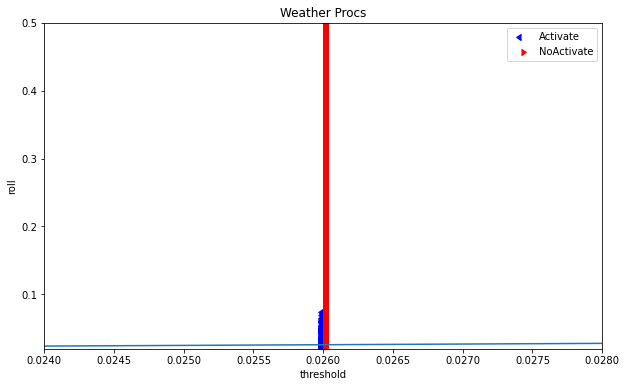

In [40]:
x_val = "threshold"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Activate", marker=CARETLEFTBASE)
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="NoActivate", marker=CARETRIGHTBASE)
ax.plot([0, 1], [0, 1])
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Weather Procs")
ax.set_xlim([0.024, 0.028])
ax.set_ylim([0.02, 0.5])
ax.legend()

,offset,weather,event_type,season,roll,threshold,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
296102,-0.025940,Weather.FLOODING,NoCure,15,0.000060,0.026,Alston Cerveza,Coolname Galvanic,<NA>,<NA>,H20;HIGH_PRESSURE,POPCORN_PAYOUTS,82,bb91c04e-b44e-4df4-918f-6d446efefc6b,213
294568,-0.025750,Weather.SALMON,NoCure,15,0.000250,0.026,Collins Melon,Fenry Marlow,<NA>,TRIPLE_THREAT,<NA>,SINKING_SHIP,81,6097899c-bb1e-4389-99e1-25edd0291e6f,223
246678,-0.025696,Weather.ECLIPSE,NoCure,15,0.000304,0.026,Nandy Fantastic,Adalberto Tosser,FIRST_BORN;MINIMALIST,CREDIT_TO_THE_TEAM;WILD,BIRD_SEED,0;UNHOLEY;CARCINIZATION,38,97c18fdd-6a8a-4e8c-9640-aa690c3e0276,25
275903,-0.025485,Weather.COFFEE,NoCure,15,0.000515,0.026,York Silk,Parker Parra,DEBT_THREE;EGO3;RETURNED;HONEY_ROASTED;DOUBLE_...,FLINCH,H20;HIGH_PRESSURE,CARCINIZATION;0;UNHOLEY,64,33d748a6-3da4-4fbd-803f-31458cf0da0d,234
296775,-0.025477,Weather.BLACK_HOLE,NoCure,15,0.000523,0.026,Avila Guzman,Castillo Turner,<NA>,<NA>,MIDDLING,GROWTH,83,ffb01670-1fea-47cd-bdb2-bb344032d045,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279378,0.036380,Weather.SUN_2,Grind,15,0.062380,0.026,Stew Briggs,Patty Fox,REPEATING;WANDERER,<NA>,TRAVELING,BIRD_SEED,67,84d8fcf3-d3d7-45db-a219-5b53d46e7842,74
300497,0.037439,Weather.ECLIPSE,Grind,15,0.063439,0.026,Richardson Games,Sosa Hayes,SIPHON;FLINCH,<NA>,TRAVELING,MIDDLING,86,af539fd5-8dca-4c73-9692-5a5625e08cc6,101
281957,0.038744,Weather.COFFEE_2,Grind,15,0.064744,0.026,Usurper Violet,Chorby Soul,<NA>,RETURNED;MARKED;TRIPLE_THREAT;EGO1,AFFINITY_FOR_CROWS,BIRD_SEED,69,d158232a-3881-400e-ba9b-8304171bd02e,166
268674,0.044277,Weather.FLOODING,Grind,15,0.070277,0.026,Pitching Machine,Alaynabella Hollywood,HONEY_ROASTED;UNCERTAIN;EGO2,<NA>,BLACKHOLE_PAYOUTS;BOTTOM_DWELLER,LIFE_OF_PARTY,58,6a8deef8-2dbb-4f40-b3e5-e142a39db75b,218


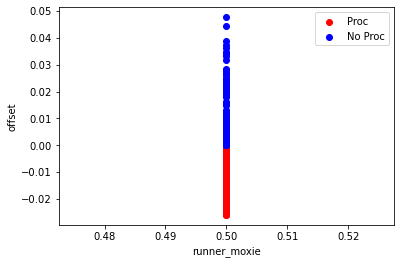

In [28]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] > 0)) | (~dfc["passed"] & (dfc["offset"] < 0))]

fig, ax = plt.subplots(1)
x_val = "runner_moxie"
y_val = "offset"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']][y_val], color="red", label="Proc")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']][y_val], color="blue", label="No Proc")
ax.set_xlabel(x_val)
ax.set_ylabel(y_val)
ax.legend()

table = outliers
table[["offset", "weather", "event_type", "season",
       "roll", "threshold",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset')


In [51]:
print(dfc[dfc["passed"]]["roll"].max())
print(dfc[~dfc["passed"]]["roll"].min())

0.02532661704696237
0.026462907893175517
